# Keith Electronics Sales Analysis Using Python To Answer Business Questions 

Tools used in this project are:

1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Plotly

Topics covered in this project are :

1. Data Extraction
2. Data Cleaning and Preparation
3. Data Manipulation and Transformation
4. Data Exploration
5. Data Visualization
6. Insight Derivation

# Problem Statement

Keith Electronics is a newly started electronic products company which sells products such as phones, laptops, headphones chargers, batteries, etc. The company just completed its first financial year in the market and is now looking to increase its presence all over the United States. As the lead Data Analyst at keith Electronics you are tasked with analyzing the past 12 months of sales data available with you to derive insights and answer the following business questions:

1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What product sold the most? Why do you think it sold the most?
4. What products are most often sold together?
5. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

### Step 1-Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)

# Import Data

### Step 2- Merge the 12 months of sales data into a single csv file
Merging 12 csvs into a single dataframe can be done in the following 4 steps
 - Read single CSV file
 - List all files in a directory 
 - Concatenating files
 - Reading in Updated dataframe


In [2]:
# Read single CSV.  

df= pd.read_csv("C:/Users/RAHUL SINGH/Downloads/DATA_ANALYST/Python/Keith_Electronics_Sales_Project/Sales_Data_Monthly/Sales_January_2019.csv") 

# List all files in a Directory

files =[file for file in os.listdir("C:/Users\RAHUL SINGH/Downloads/DATA_ANALYST/Python/Keith_Electronics_Sales_Project/Sales_Data_Monthly")]

for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


So we have successfully listed all the files that we need from the directory

In [3]:
# Import all files in the Directory and concatenate them

all_months_data= pd.DataFrame()
files =[file for file in os.listdir("C:/Users\RAHUL SINGH/Downloads/DATA_ANALYST/Python/Keith_Electronics_Sales_Project/Sales_Data_Monthly")]

for file in files:
    df= pd.read_csv("C:/Users\RAHUL SINGH/Downloads/DATA_ANALYST/Python/Keith_Electronics_Sales_Project/Sales_Data_Monthly/"+ file)
    all_months_data=pd.concat([all_months_data, df])
    
# Convert the concatenated data to CSV

all_months_data.to_csv("all_data.csv", index=False)
all_months_data.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

We have now successfully merged all the monthly sales data to get an aggregated dataset containing the sales data for the entire year

### Step 3- Read the updated csv file containing all months data

In [4]:
all_data=pd.read_csv("C:/Users\RAHUL SINGH/Downloads/DATA_ANALYST/Python/Keith_Electronics_Sales_Project/Sales_Data_Aggregated/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


This is how our aggregated data looks like. As we can see it contains 6 columns.

So the next step in our analysis would be to drop the empty rows or null values.

### Step 4- Drop null values/empty rows 

In [5]:
all_data=all_data.dropna().reset_index()
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Now that we have removed the empty rows we move on to the next step of adding necessary columns required for our analysis

### Step 5- Add Month Column
The Month column can be added by extracting the month from the "Order Date" data by using the Parse string in Pandas cell (.str) function

But the month extracted using the .str function would be a string. So we need to convert the datatype of "Month" column to integer at later stages.


In [6]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


The data in the month column after the above operation is a string. We need to convert Month from string to integer by giving the following command:

all_data["Month"]=all_data["Month"].astype("int32")


But the above command gives an error - "ValueError: invalid literal for int() with base 10: 'Or'" 

This is because the data in our "Month" column contains strings not consisting of digits. To be precise, the data in our "Month" column contains the string "Or" in place of the month number.

We need find the rows containing "Or" in "Month" and remove them.

#### Remove Rows based on condition 

In [7]:
# Firstly find the rows where Month="Or" 

all_data.loc[all_data["Month"]=="Or"]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...,...
184624,185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185009,185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186019,186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186088,186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


Now that we know which rows are containing "Or" we can define a new dataframe not consisting of these rows.

In [8]:
# Remove rows where Month="Or"

all_data=all_data.loc[all_data["Month"]!="Or"]
all_data.count()


index               185950
Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
dtype: int64

Now that our dataframes contains only digits in the "Month" column we can easily change the dataype from string to integer.

In [9]:
# Now convert Month datatype from string to integer

all_data["Month"]=all_data["Month"].astype("int32")
all_data

C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/4253850762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Month"].astype("int32")


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186301,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186302,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Step 6- Add Sales Column

Now we need to add a sales column which gives the sale amount of each order by multiplying the order quantity and the product pice. We can do that by using the following command:

all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]

But the above command again gives an error: "can't multiply sequence by non-int of type 'str'" 

This is beacuse "Quantity" and "Price" are being interpreted as strings

To solve this error we need to convert "Quantity" and "Price" to integers too.

In [10]:
# Resolving th error

all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"]= all_data["Price Each"].astype("float")

C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/111775875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype("int32")
C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/111775875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"]= all_data["Price Each"].astype("float")


we have successfully converted the Quantity and Price to integers. Now we can easily create the Sales column

In [11]:
# Adding Sales Column

all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/2289737096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Step 7 : Add City Column
We need to extract the city and state from the address colunm.
we do so by using the split function.
Then we use the apply function. 

In [12]:
all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
all_data


# We can also perform the above operation by defining a function as follows:

# def get_city(address):
#     return address.split(',')[1]

# def get_state(address):
#     return address.split(',')[2].split(' ')[1]

# all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))

# F STRING METHOD 

# all_data["City"]=all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/1947926954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186301,186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186302,186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


So till now we have successfully:

-Aggregated our data from multiple files into a single file 

-Cleaned our data by removing missing value rows, rows containing faulty values

-Created new columns required for analysis by extracting data from already existing columns

-Changed the datatypes of various columns to convert them to suitable datatypes.
    
Now our dataset contains everything we need and is ready for analysis.    

### Question 1- Which was the best month for sales? How much sale was made that month? 
To answer this question we will group the data by month and add up the sales followed by visualizing our results with bar chart in Seaborn


In [13]:
# To answer this question we will group the data by month and add up the sales

sales_by_month=all_data.groupby(by="Month").sum()[["Sales"]].sort_values(by="Sales", ascending=False).reset_index()
sales_by_month

,Month,Sales
0,12,4613443.34
1,10,3736726.88
2,4,3390670.24
3,11,3199603.20
4,5,3152606.75
5,3,2807100.38
6,7,2647775.76
7,6,2577802.26
8,8,2244467.88
9,2,2202022.42


Text(0.5, 1.0, 'SALES BY MONTH')

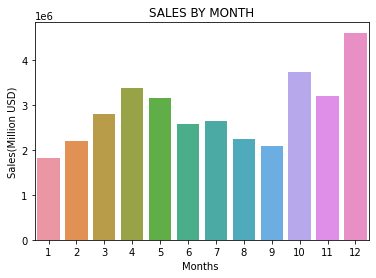

In [14]:
# We plot a bar plot to see the sales

sales_by_month_plot=sns.barplot(data=sales_by_month, x="Month", y="Sales")
sales_by_month_plot.set(xlabel="Months ", ylabel="Sales(Million USD)")
plt.title("SALES BY MONTH")


### Answer 1 : From the above plot and data we can see that December was the best month for sales. The sale in December was worth $ 4.6 million.

This could be attributed to the fact that we have Christmas and New Year both coming up in December leading to the huge sales. 

In [15]:
# We can also plot the above graph using matplotlib

### Question 2- Which city had the highest sale?
To answer this question we will group the data by city and then add up the sales. Then we arrange the data in descending order and plot a bar graph to see the city with the highest sale.

In [16]:
# To answer this question we will group the data by city and then add up the sales

sales_by_city=all_data.groupby(by="City").sum()[["Sales"]].sort_values(by="Sales", ascending =False).reset_index()
sales_by_city

,City,Sales
0,San Francisco CA,8262203.91
1,Los Angeles CA,5452570.80
2,New York City NY,4664317.43
3,Boston MA,3661642.01
4,Atlanta GA,2795498.58
5,Dallas TX,2767975.40
6,Seattle WA,2747755.48
7,Portland OR,1870732.34
8,Austin TX,1819581.75
9,Portland ME,449758.27


Text(0.5, 1.0, 'SALES BY CITY')

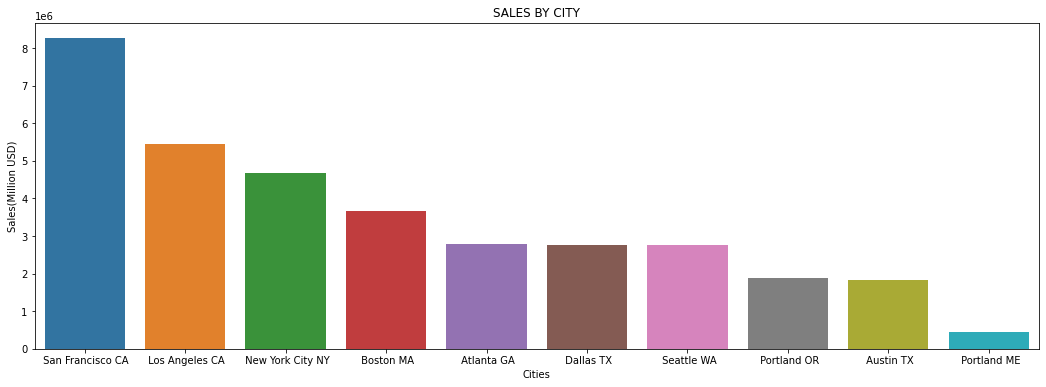

In [17]:
# Now we plot the graph for our sales by city

plt.figure(figsize=(18,6))
sales_by_city_plot=sns.barplot(data=sales_by_city, x="City", y="Sales")
plt.xlabel("Cities")
plt.ylabel("Sales(Million USD)")
plt.title("SALES BY CITY")

### Answer 2: From the above data and plot we can clearly infer that San Francisco had the highest sale of $ 8.2 million.

### Question 3 : At what time should we display advertisements to increase the liklihood of customers buying the product? 
To answer this question we firstly need to extract the order time from the order date column.

For this we need to add a column containing the hour of ordering.

In [18]:
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186301,186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186302,186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186303,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


To extract the hour of ordering from the order date we can simply convert the order date to datetime format and then extract the hour from that.

In [19]:
# Convert order date to datetime format
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])
all_data

#Extract hour
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data

C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/732504990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])
C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/732504990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"]=all_data["Order Date"].dt.hour


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20
186301,186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16
186302,186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7
186303,186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17


Now that we have added the hour of ordering to our dataset we can simply group the data by hour and then add up the quantity ordered to see the hour of the day at which maximum orders have been placed. 

In [20]:
order_by_hour=all_data.groupby(by="Hour").sum()[["Quantity Ordered", "Sales"]].sort_values(by="Sales", ascending= False).reset_index()
order_by_hour

,Hour,Quantity Ordered,Sales
0,19,14470,2412938.54
1,12,14202,2316821.34
2,11,14005,2300610.24
3,20,13768,2281716.24
4,18,13802,2219348.30
5,13,13685,2155389.80
6,17,12229,2129361.61
7,14,12362,2083672.73
8,21,12244,2042000.86
9,10,12308,1944286.77


We dont need the sum of quantity ordered, rather we need the count of quantity ordered to determine the number of oreders placed at each hour of the day.

In [21]:
order_by_hour=all_data.groupby(by="Hour").count()[["Quantity Ordered"]].sort_values(by="Quantity Ordered", ascending= False).reset_index()
order_by_hour

,Hour,Quantity Ordered
0,19,12905
1,12,12587
2,11,12411
3,18,12280
4,20,12228
5,13,12129
6,14,10984
7,10,10944
8,21,10921
9,17,10899


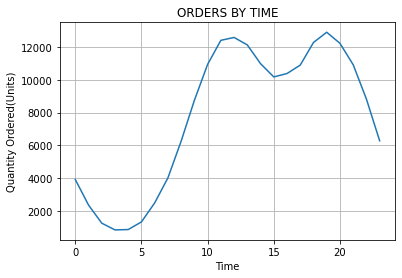

In [22]:
# Now we plot the graph for orders placed at each hour

sns.lineplot(data=order_by_hour, x="Hour", y="Quantity Ordered")
plt.title("ORDERS BY TIME")
plt.xlabel("Time")
plt.ylabel("Quantity Ordered(Units)")
plt.grid()

Text(0, 0.5, 'Quantity Ordered(Units)')

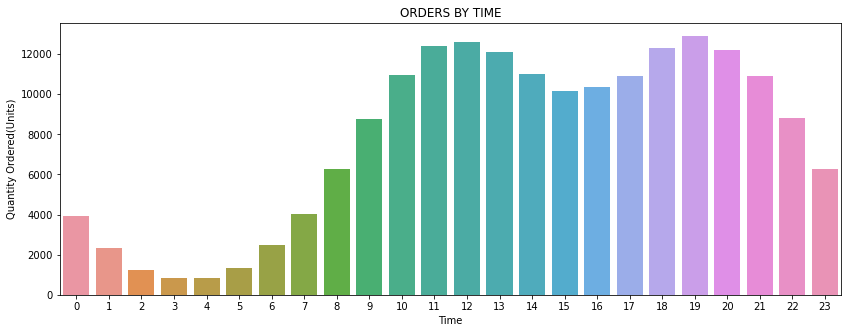

In [23]:
plt.figure(figsize=(14,5))
sns.barplot(data=order_by_hour, x="Hour", y="Quantity Ordered")
plt.title("ORDERS BY TIME")
plt.xlabel("Time")
plt.ylabel("Quantity Ordered(Units)")

### Answer 3: Based on above graphs my recommendation would be to show the ads between 11am to 12pm in the afternoon and 6pm to 8pm in the evening

### Question 4 : What products are most often sold together?
To answer this question we need to keep in mind the fact that all products that were ordered together will have same Order ID.

In [24]:
all_data

# All the products that were ordered together will have same order ID

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...,...
186300,186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20
186301,186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16
186302,186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7
186303,186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17


To find the products that were ordered together we need 3 steps:
    
-Filter out all the data that has duplicate order IDs
    
-Add column to display combination of products ordered together (this can be done by using the transform and join function)
    
-Select Required columns and drop duplicates

In [25]:
# Filter out all the data that has duplicate Order IDs

df=all_data[all_data["Order ID"].duplicated(keep=False)]

# Add column to display combination of products ordred together

df["Combo"]= df.groupby(by="Order ID")["Product"].transform(lambda x: ",".join(x))

# Select required columns and drop duplicates

df= df[["Order ID", "Combo"]].drop_duplicates()
df

C:\Users\RAHULS~1\AppData\Local\Temp/ipykernel_11752/3333874456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Combo"]= df.groupby(by="Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Combo
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [26]:
print(df.groupby('Combo').size())

Combo
20in Monitor,20in Monitor                             3
20in Monitor,27in FHD Monitor                         2
20in Monitor,34in Ultrawide Monitor                   1
20in Monitor,AA Batteries (4-pack)                    6
20in Monitor,AAA Batteries (4-pack)                   3
                                                   ... 
iPhone,USB-C Charging Cable                          12
iPhone,Vareebadd Phone                                3
iPhone,Wired Headphones                             361
iPhone,Wired Headphones,Lightning Charging Cable      1
iPhone,iPhone                                         1
Length: 366, dtype: int64


In [27]:
print(df['Combo'].value_counts(ascending=False))

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Combo, Length: 366, dtype: int64


### Answer 4: From above data we can see the top 5 product combinations sold together are:
1. iPhone,Lightning Charging Cable 
2. Google Phone,USB-C Charging Cable                                          
3. iPhone,Wired Headphones                                                    
4. Vareebadd Phone,USB-C Charging Cable                                      
5. Google Phone,Wired Headphones 

### Question 5 : Which product had the highest sales?
To answer this question we need to group by product an then add up the quantity ordered.

In [28]:
# To answer this question we need to group by product an then add up the quantity ordered

max_sale_products=all_data.groupby("Product").sum()[["Quantity Ordered", "Sales"]].sort_values("Quantity Ordered", ascending= False).reset_index()
max_sale_products

,Product,Quantity Ordered,Sales
0,AAA Batteries (4-pack),31017,92740.83
1,AA Batteries (4-pack),27635,106118.40
2,USB-C Charging Cable,23975,286501.25
3,Lightning Charging Cable,23217,347094.15
4,Wired Headphones,20557,246478.43
5,Apple Airpods Headphones,15661,2349150.00
6,Bose SoundSport Headphones,13457,1345565.43
7,27in FHD Monitor,7550,1132424.50
8,iPhone,6849,4794300.00
9,27in 4K Gaming Monitor,6244,2435097.56


From the above data we can see the quantity ordered of different products as well as the sales made by that product.

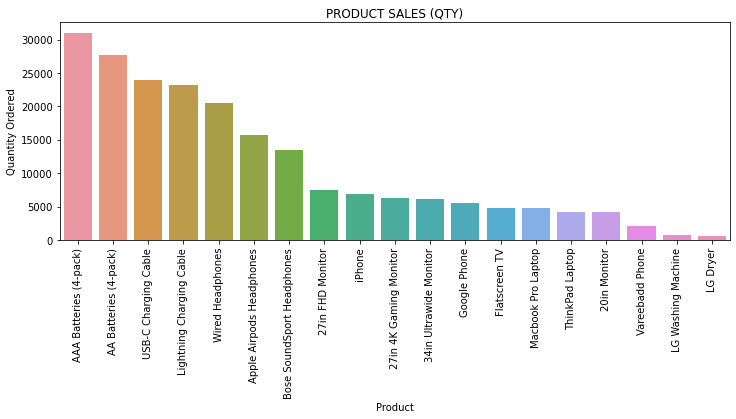

In [29]:
plt.figure(figsize=(12,4))
ax=sns.barplot(data=max_sale_products, x="Product", y="Quantity Ordered")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("PRODUCT SALES (QTY)")
plt.show()

If we go by the quantity ordered then the "AAA BAtteries (4-Pack)" is the product that is sold the most.

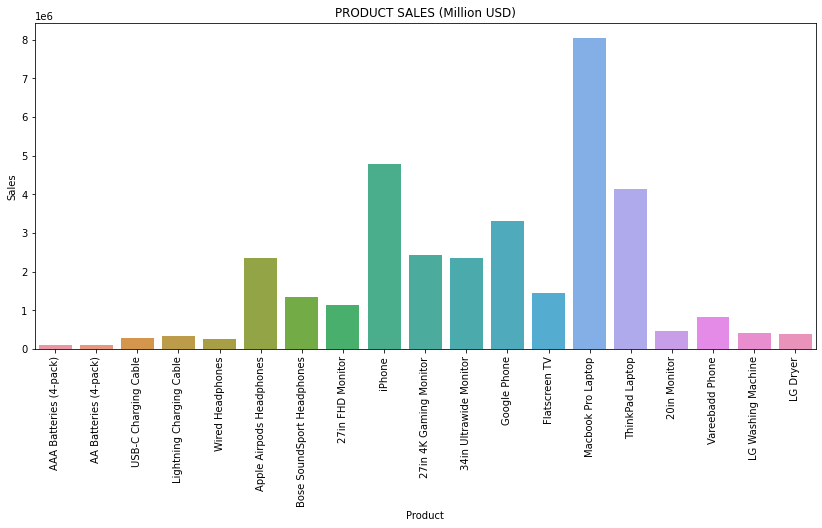

In [30]:
plt.figure(figsize=(14,6))
ax=sns.barplot(data=max_sale_products, x="Product", y="Sales")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("PRODUCT SALES (Million USD)")
plt.show()

But if we go by the sales value then we can see that the "Macbook Pro Laptop" is the product that made the highest sales.

The explanation for some products being ordered more than others can be given by looking at the individual prices of each item.

The cheaper products have been ordered in a comparitively larger number than the expensive ones

In [31]:
# Now we are trying to comapre the prices to see why some products are ordered more than others

product_by_price=all_data.groupby("Product").mean()[["Price Each"]].sort_values(by="Price Each", ascending= False).reset_index()
product_by_price

,Product,Price Each
0,Macbook Pro Laptop,1700.00
1,ThinkPad Laptop,999.99
2,iPhone,700.00
3,LG Dryer,600.00
4,LG Washing Machine,600.00
5,Google Phone,600.00
6,Vareebadd Phone,400.00
7,27in 4K Gaming Monitor,389.99
8,34in Ultrawide Monitor,379.99
9,Flatscreen TV,300.00


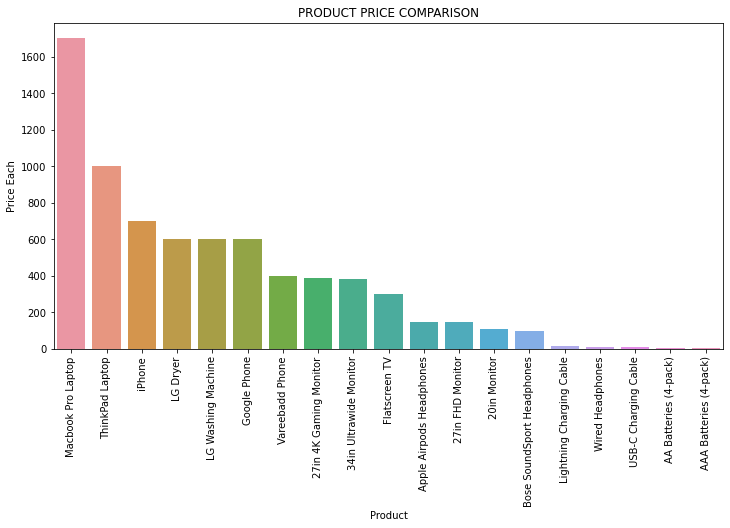

In [32]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=product_by_price, x="Product", y="Price Each")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("PRODUCT PRICE COMPARISON")
plt.show()

we can also plot the prices and quantity ordered in the same graph. thias would give us better picture of sales trends

### The answers to our Business Questions are as follows:

1. December was the best month for sales. The sale in December was worth $ 4.6 million.

2. San Francisco had the highest sale of $ 8.2 million.

3. Based on the data my recommendation would be to show the ads between 11am to 12pm in the afternoon and 6pm to 8pm in the        evening.

4. The top 5 product combinations sold together are:
   1. iPhone,Lightning Charging Cable 
   2. Google Phone,USB-C Charging Cable                                          
   3. iPhone,Wired Headphones                                                    
   4. Vareebadd Phone,USB-C Charging Cable                                      
   5. Google Phone,Wired Headphones  

5. If we go by the quantity ordered then the "AAA BAtteries (4-Pack)" is the product that is sold the most. But if we go by the sales value then we can see that the "Macbook Pro Laptop" is the product that made the highest sales.


# Summary

In this Project we used Python Pandas, Numpy, Seaborn & Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contained hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 